<h1 align="center">Image Classification</h1>
<h2 align="center">Object Detection for chess pieces</h2>
<h4 align="center">Linus Fackler and Fernando Colman</h4>

# About the dataset

The dataset we are using is from https://public.roboflow.com/object-detection/chess-full
The reason we chose this dataset was because it has the specific labeling type needed for training a YoloV7 model.
The dataset consists of imgages of chessboard with chesspieces.
There are 13 different classes:
'bishop', 'black-bishop', 'black-king', 'black-knight', 'black-pawn', 'black-queen', 'black-rook', 'white-bishop', 'white-king', 'white-knight', 'white-pawn', 'white-queen', 'white-rook'

### What the model should be able to predict
The model should be able to recognize chess pieces and identify which type of chess piece it is (bishop, pawn, rook, ...)


### Preprocessing of Data
There is no preprocessing that needs to be done here.

### Split into train, test, val
This step is also not necessary with this dataset, as it already comes with a premade split.
There are 202 train images, 58 validation and 29 test.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

# Sequential Model

### Reading in data

I've had problems with my original chess dataset for this part of the project. That's why I am using a tensorflow example dataset, so that I can at least get some results.

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print("Number of images: ", image_count)

Number of images:  3670


Here we took 270 images out of the list and put it into test

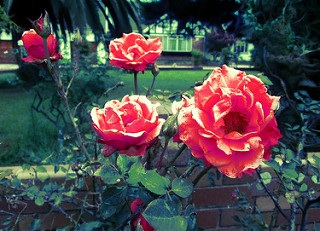

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

In [ ]:
# %cd ..
# %ls
# train_url = "/content/drive/MyDrive/Colab Notebooks/Chess dataset/train"
# test_url = "/content/drive/MyDrive/Colab Notebooks/Chess dataset/test"
# val_url = "/content/drive/MyDrive/Colab Notebooks/Chess dataset/valid"

# train_ds = tf.keras.utils.image_dataset_from_directory(train_url, labels=None, validation_split=None, image_size=(200, 134), batch_size=16)
# test_ds = tf.keras.utils.image_dataset_from_directory(test_url, labels=None, validation_split=None, image_size=(200, 134), batch_size=16)
# val_ds = tf.keras.utils.image_dataset_from_directory(val_url, labels=None, validation_split=None, image_size=(200, 134), batch_size=16)

Found 202 files belonging to 1 classes.
Found 29 files belonging to 1 classes.
Found 58 files belonging to 1 classes.


### Creating a dataset

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.4,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2202 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=None,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.


In [ ]:
class_names = train_ds.class_names
print("Classes: ", class_names)

Classes:  ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


### Visualizing the Data

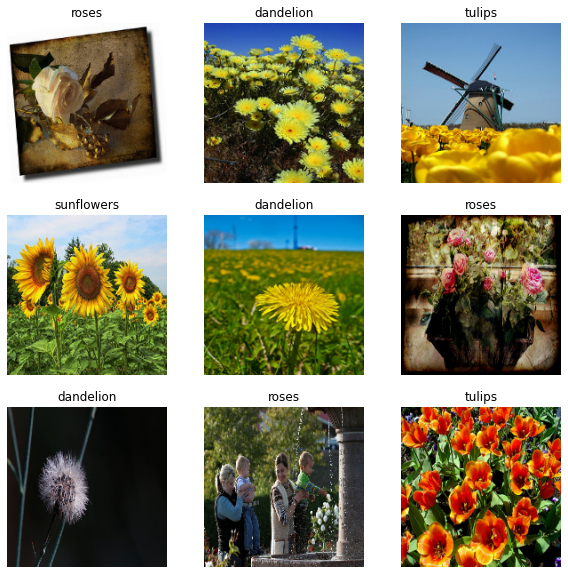

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Creating a model

In [ ]:
num_classes = len(class_names)

model = tf.keras.models.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 667,141
Trainable params: 667,141
Non-tr

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
history = model.fit(train_ds, batch_size=32, epochs=10, validation_data=val_ds)

Epoch 1/10
92/92 [==============================] - 16s 75ms/step - loss: 1.2986 - accuracy: 0.4285 - val_loss: 1.0989 - val_accuracy: 0.5518
Epoch 2/10
92/92 [==============================] - 7s 70ms/step - loss: 0.9951 - accuracy: 0.6063 - val_loss: 0.9612 - val_accuracy: 0.6172
Epoch 3/10
92/92 [==============================] - 7s 72ms/step - loss: 0.8066 - accuracy: 0.6928 - val_loss: 0.8758 - val_accuracy: 0.6635
Epoch 4/10
92/92 [==============================] - 7s 73ms/step - loss: 0.5961 - accuracy: 0.7766 - val_loss: 0.8428 - val_accuracy: 0.6839
Epoch 5/10
92/92 [==============================] - 7s 70ms/step - loss: 0.3783 - accuracy: 0.8719 - val_loss: 1.0283 - val_accuracy: 0.6730
Epoch 6/10
92/92 [==============================] - 7s 71ms/step - loss: 0.2230 - accuracy: 0.9264 - val_loss: 1.2306 - val_accuracy: 0.6662
Epoch 7/10
92/92 [==============================] - 7s 71ms/step - loss: 0.1255 - accuracy: 0.9642 - val_loss: 1.4477 - val_accuracy: 0.6471
Epoch 8/10
9

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Evaluate the model

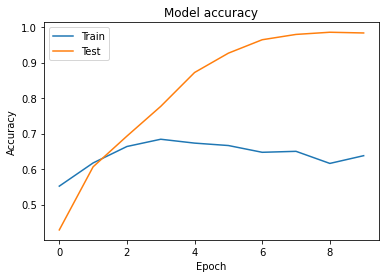

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# CNN architecture

We are going to use the same dataset as we did for the sequential.

In [ ]:
num_filters = 8
filter_size = 3
pool_size = 2

model2 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2304)              0         
                                                                 
 dropout_4 (Dropout)         (None, 2304)             

### Train model

In [ ]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history2 = model2.fit(train_ds, batch_size=32, epochs=10, validation_data=val_ds)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


92/92 [==============================] - 10s 93ms/step - loss: 55.3183 - accuracy: 0.2708 - val_loss: 1.6131 - val_accuracy: 0.2766
Epoch 2/10
92/92 [==============================] - 8s 79ms/step - loss: 1.4799 - accuracy: 0.3784 - val_loss: 1.6985 - val_accuracy: 0.2779
Epoch 3/10
92/92 [==============================] - 11s 112ms/step - loss: 1.2903 - accuracy: 0.4704 - val_loss: 1.8022 - val_accuracy: 0.3011
Epoch 4/10
92/92 [==============================] - 7s 74ms/step - loss: 1.1900 - accuracy: 0.5228 - val_loss: 2.1110 - val_accuracy: 0.3052
Epoch 5/10
92/92 [==============================] - 7s 75ms/step - loss: 1.0196 - accuracy: 0.6144 - val_loss: 2.2935 - val_accuracy: 0.3542
Epoch 6/10
92/92 [==============================] - 7s 72ms/step - loss: 0.9315 - accuracy: 0.6458 - val_loss: 2.7418 - val_accuracy: 0.3338
Epoch 7/10
92/92 [==============================] - 7s 72ms/step - loss: 0.8230 - accuracy: 0.7006 - val_loss: 2.5255 - val_accuracy: 0.3706
Epoch 8/10
92/92 [==

### Evaluate the model

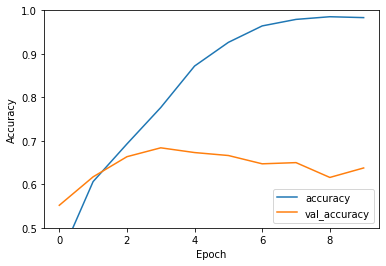

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Pretrained Model
I've decided to use the YOLOv7 model for this project, as it seems to be the best open-source model for objects detection.
I personally have experience with it, which was another factor as to why I chose this.

![](https://raw.githubusercontent.com/WongKinYiu/yolov7/main/figure/performance.png)

In [ ]:
# Downloading YOLO v7 Code
!git clone https://github.com/WongKinYiu/yolov7.git
%cd yolov7
!ls

Cloning into 'yolov7'...
remote: Enumerating objects: 1094, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 1094 (delta 0), reused 2 (delta 0), pack-reused 1091
Receiving objects: 100% (1094/1094), 69.85 MiB | 23.76 MiB/s, done.
Resolving deltas: 100% (521/521), done.
/content/yolov7
cfg	detect.py  hubconf.py  models	  requirements.txt  tools	  utils
data	export.py  inference   paper	  scripts	    train_aux.py
deploy	figure	   LICENSE.md  README.md  test.py	    train.py


In [ ]:
# Pre-trained weights
!wget https://github.com/WongKinbYiu/yolov7/releases/download/v0.1/yolov7.pt

--2022-12-05 05:00:24--  https://github.com/WongKinbYiu/yolov7/releases/download/v0.1/yolov7.pt
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-12-05 05:00:24 ERROR 404: Not Found.



### Resizing images

I decided to later comment out this section, as yolov7 does its own image resizing. Originallz I wanted to do this so that it would not train with 2048px images, which would take too long.

I still kept it for future references, as I think the code is very helpful.
Also, in case I ever want to use a different pretrained model, this might become helpful.

In [ ]:
# from PIL import Image

# directory = "/content/drive/MyDrive/Colab Notebooks/Chess/train/images"

# basewidth = 640

# for filename in os.listdir(directory):
#   f = os.path.join(directory, filename)
#   img = Image.open(f)
#   wpercent = (basewidth / float(img.size[0]))
#   hsize = int((float(img.size[1]) * float(wpercent)))
#   img = img.resize((basewidth, hsize), Image.ANTIALIAS)
#   img.save(f)

### Training

This is where the **transfer learning** comes into play. We will now train the pretrained model with a new type of image. The images won't consist any of the 80 previous classes from the YOLOv7 (which actually is from the coco dataset), now we will only have our 13 classes, which include the chess figures.

In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/yolov7"
!python train.py --epochs 30 --weights yolov7.pt --batch-size 16 --data "/content/drive/MyDrive/Colab Notebooks/Chess/data.yaml" --name yolov7-custom --device 0 --exist-ok

/content/drive/MyDrive/Colab Notebooks/yolov7
YOLOR 🚀 2022-12-5 torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='', data='/content/drive/MyDrive/Colab Notebooks/Chess/data.yaml', device='0', entity=None, epochs=30, evolve=False, exist_ok=True, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='yolov7-custom', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov7-custom', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, v5_metric=False, weights='yolov7.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, w

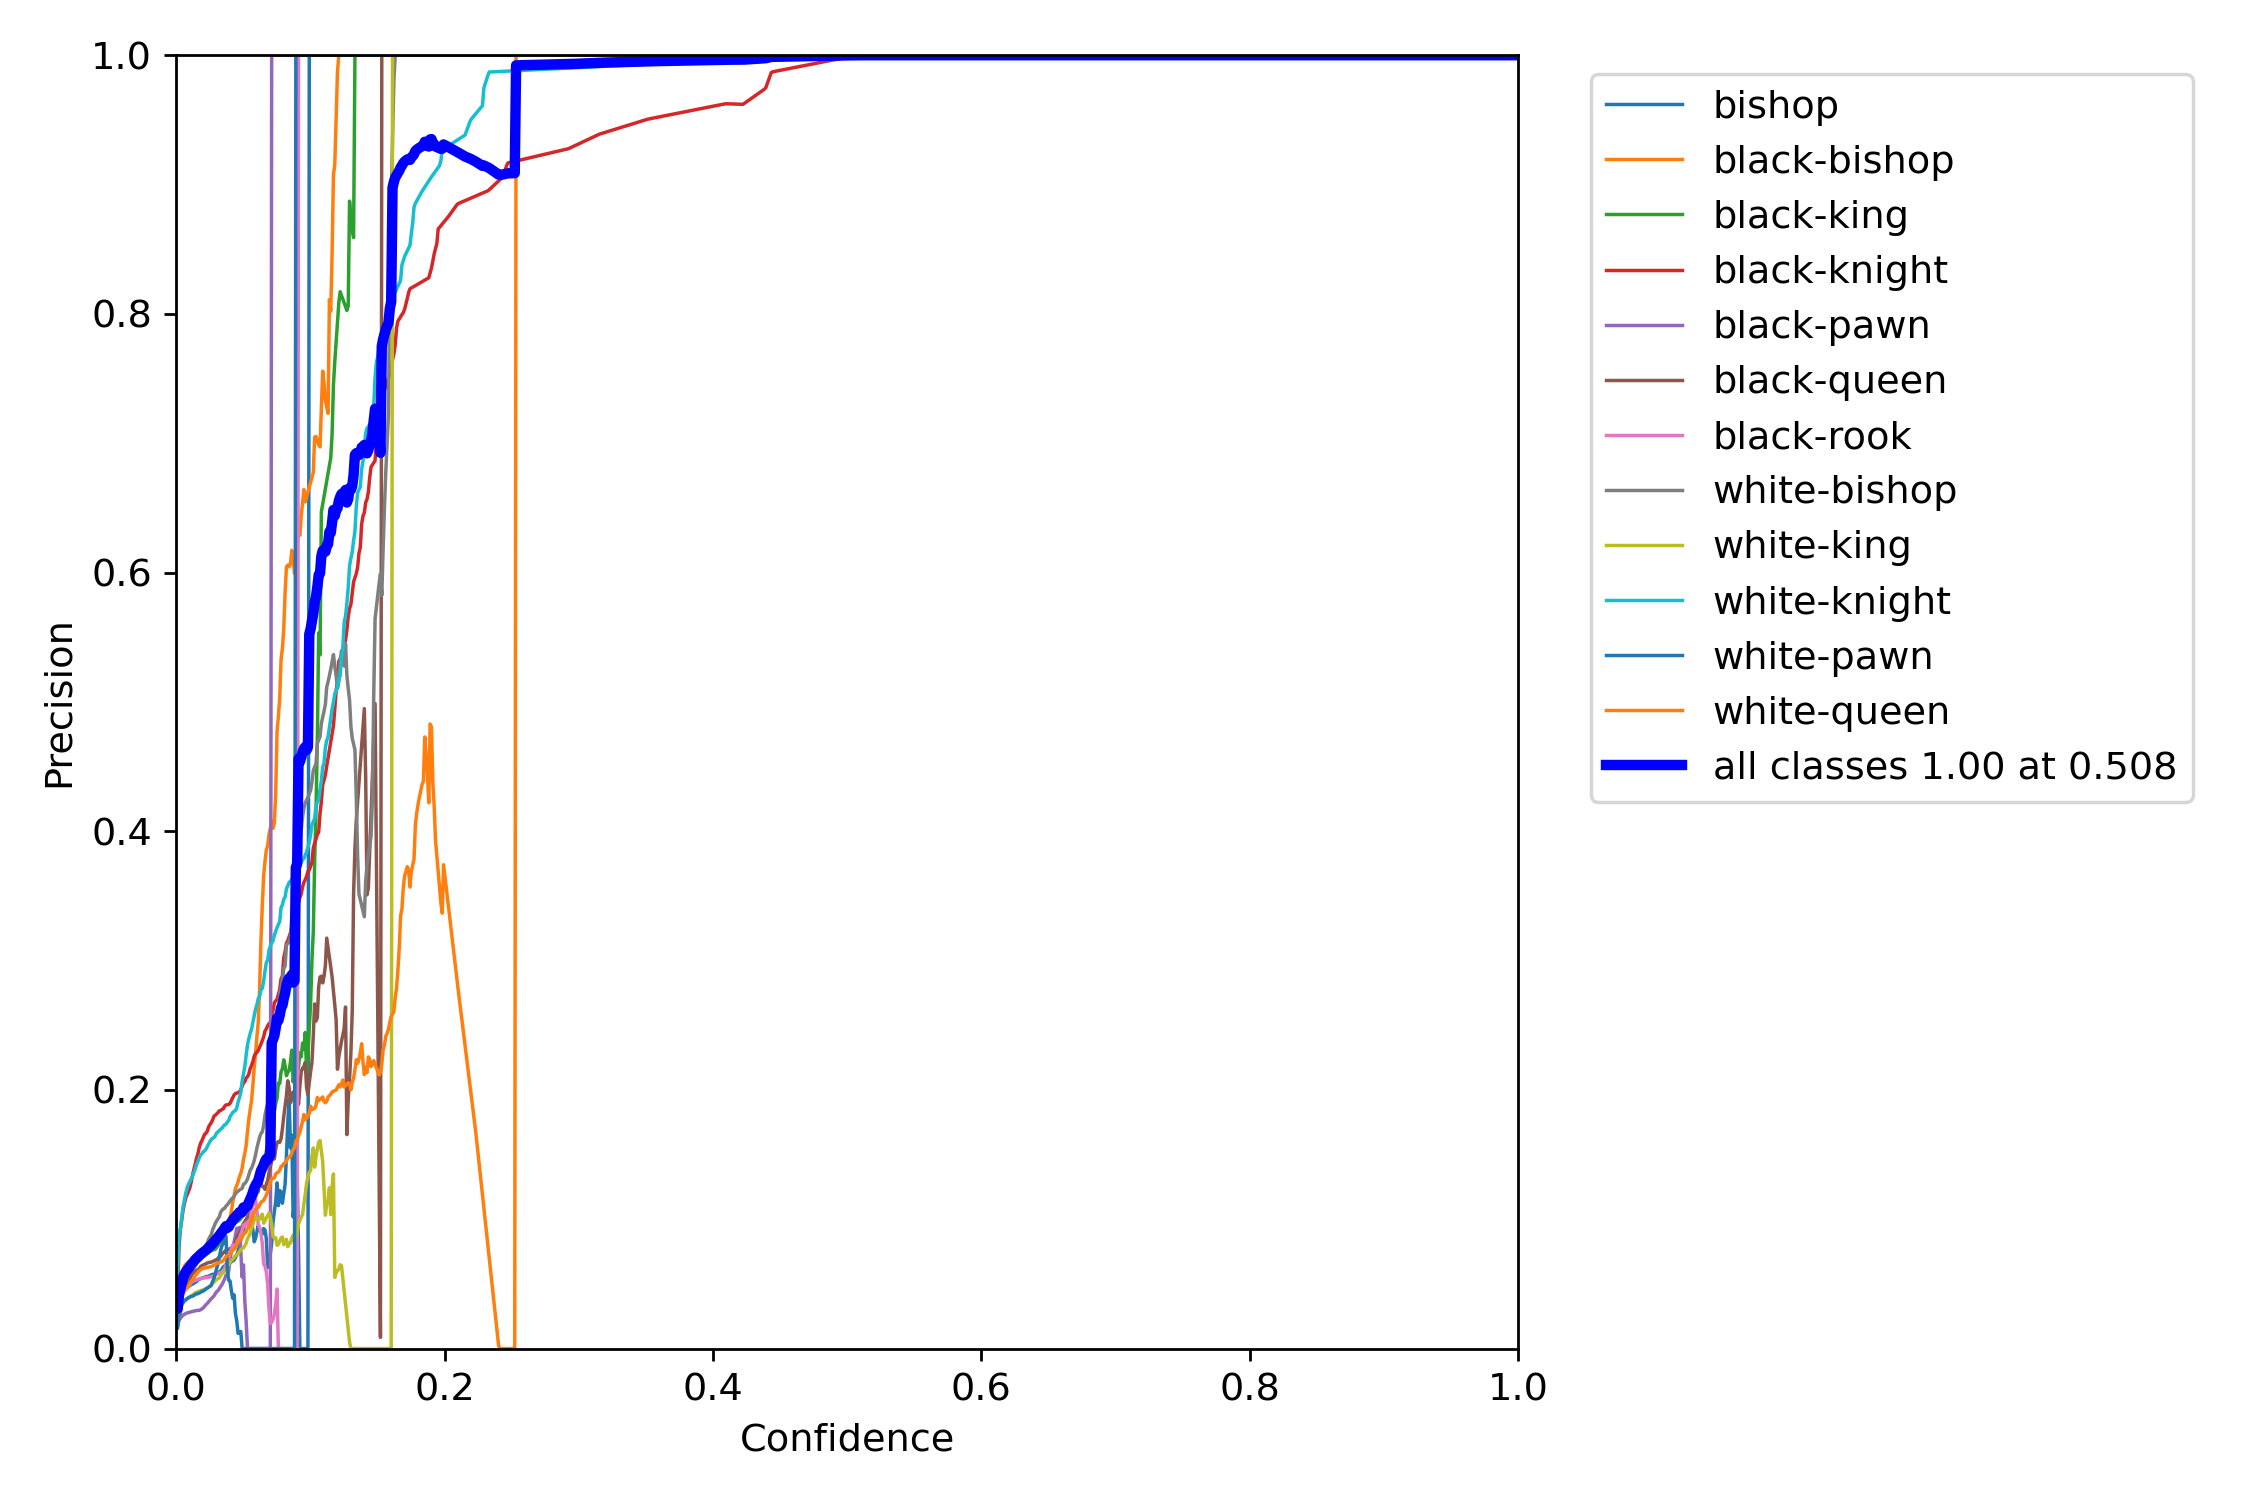

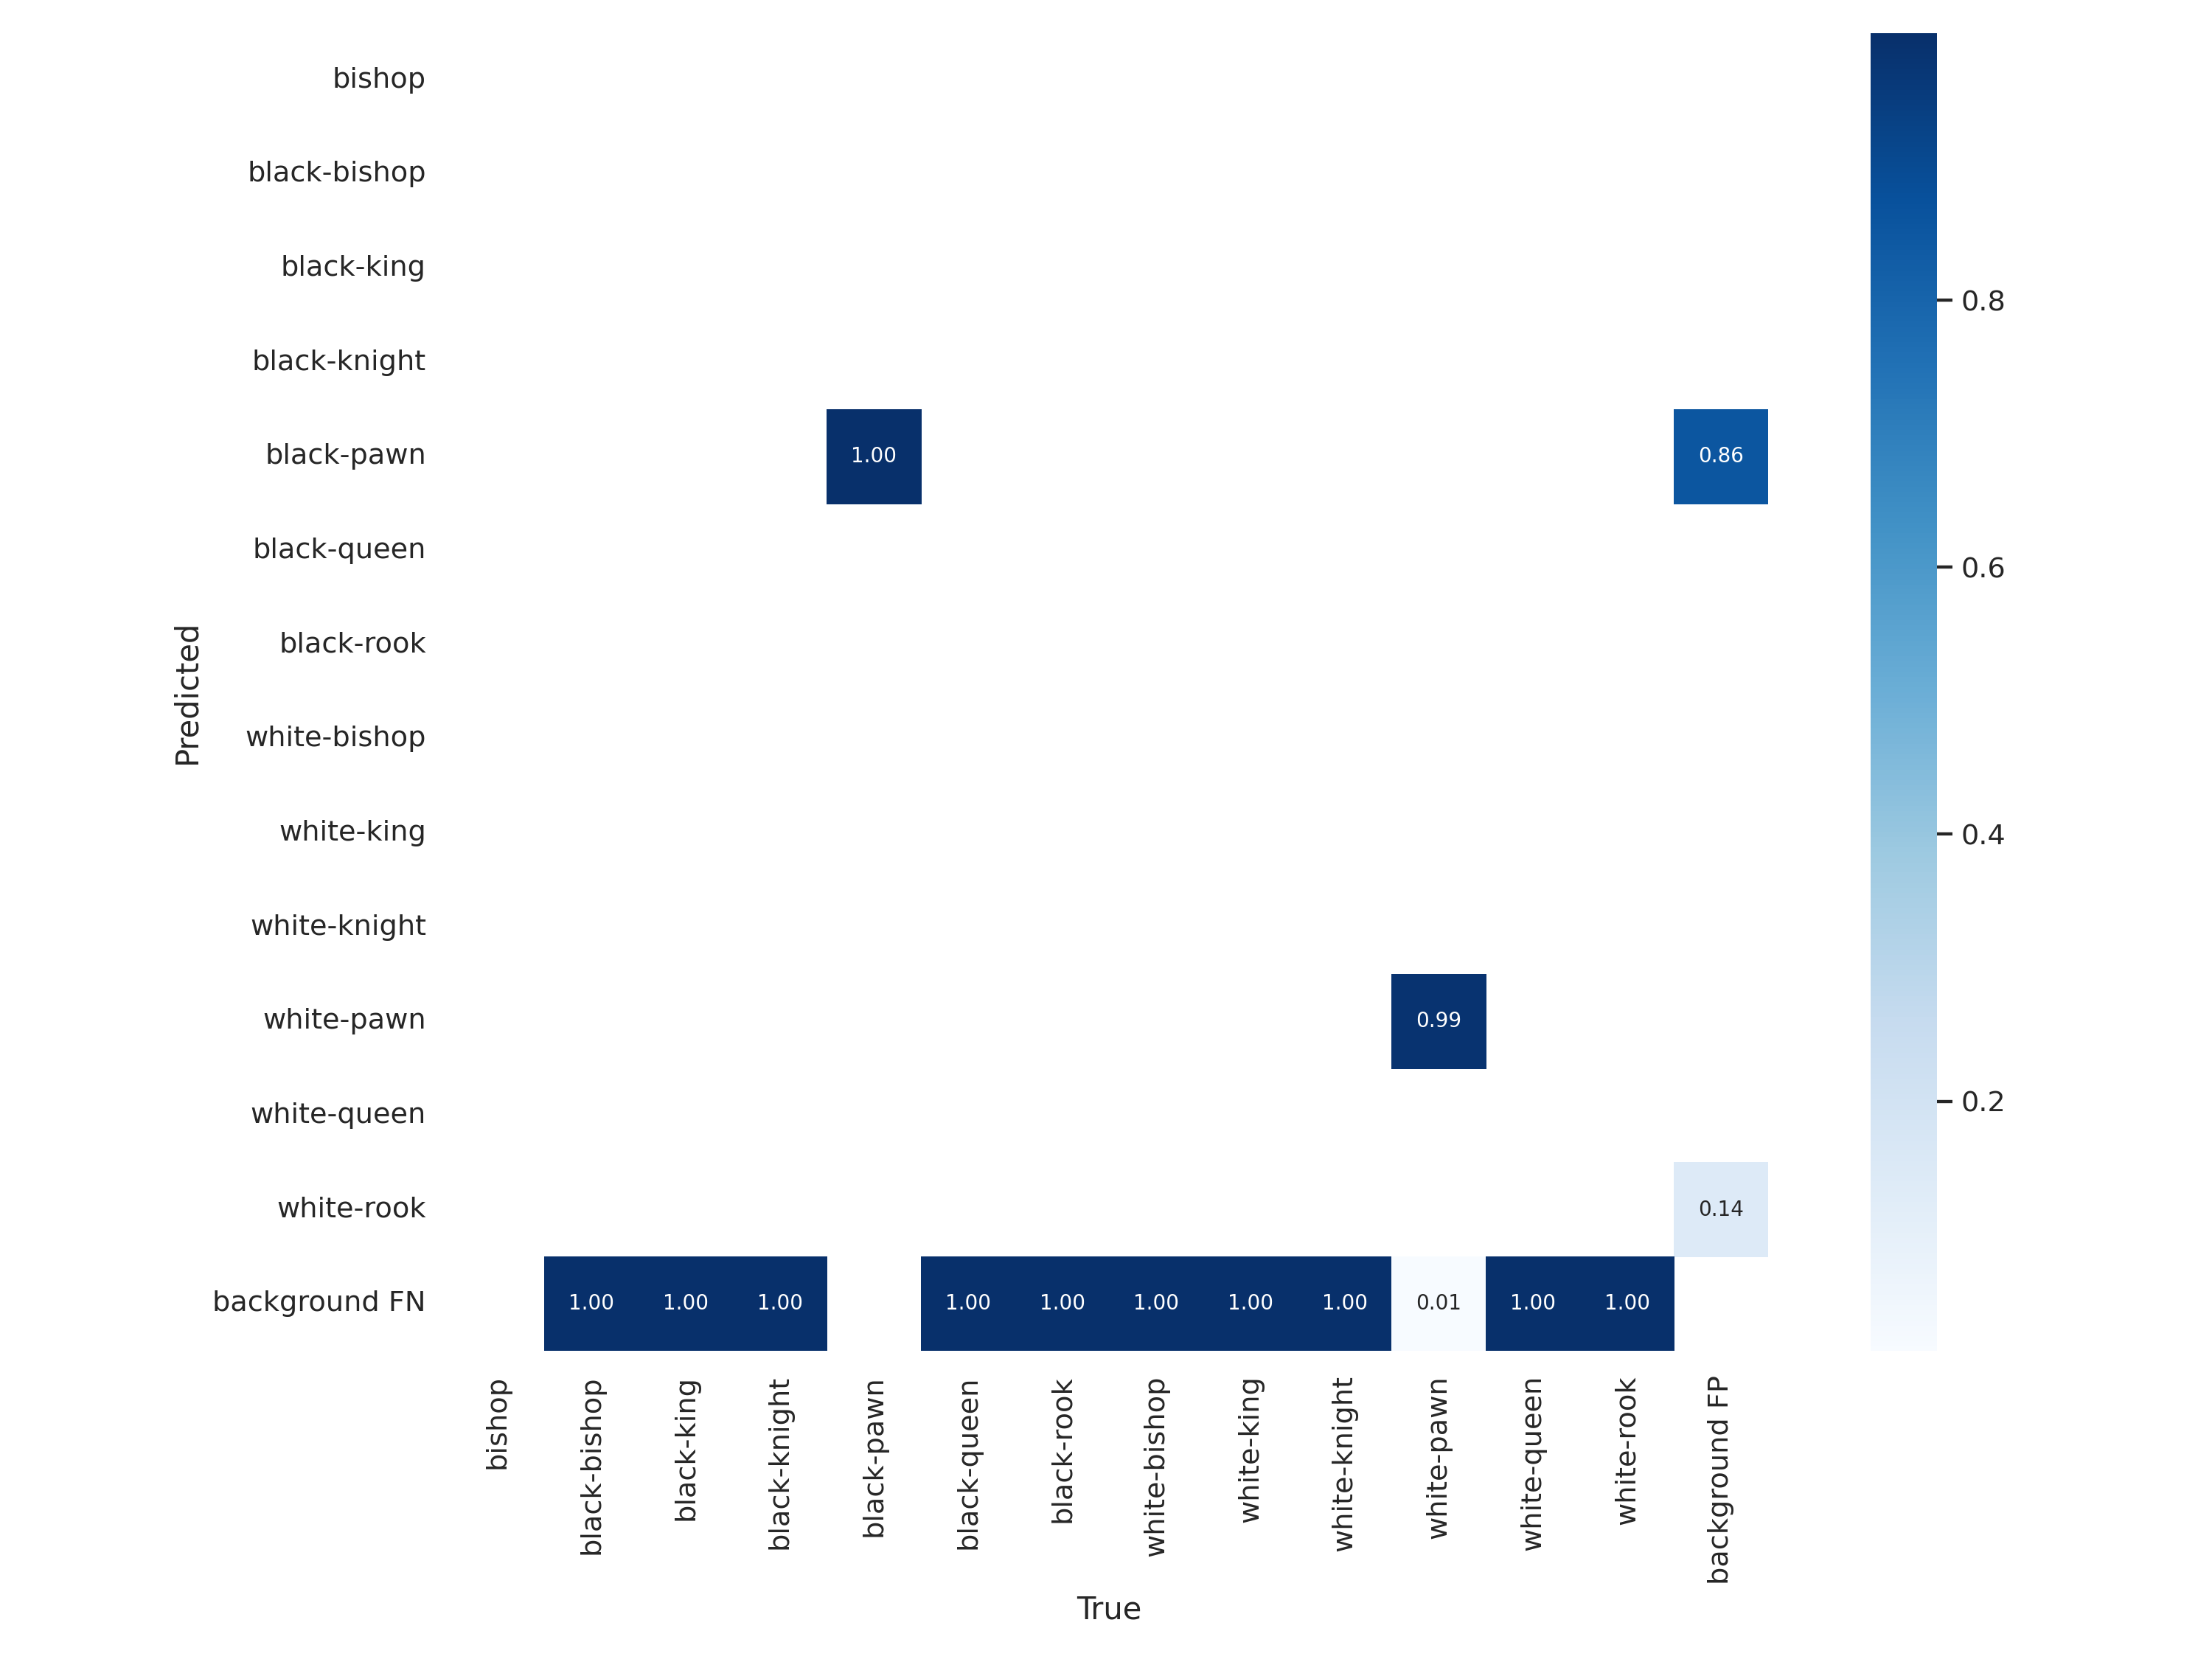

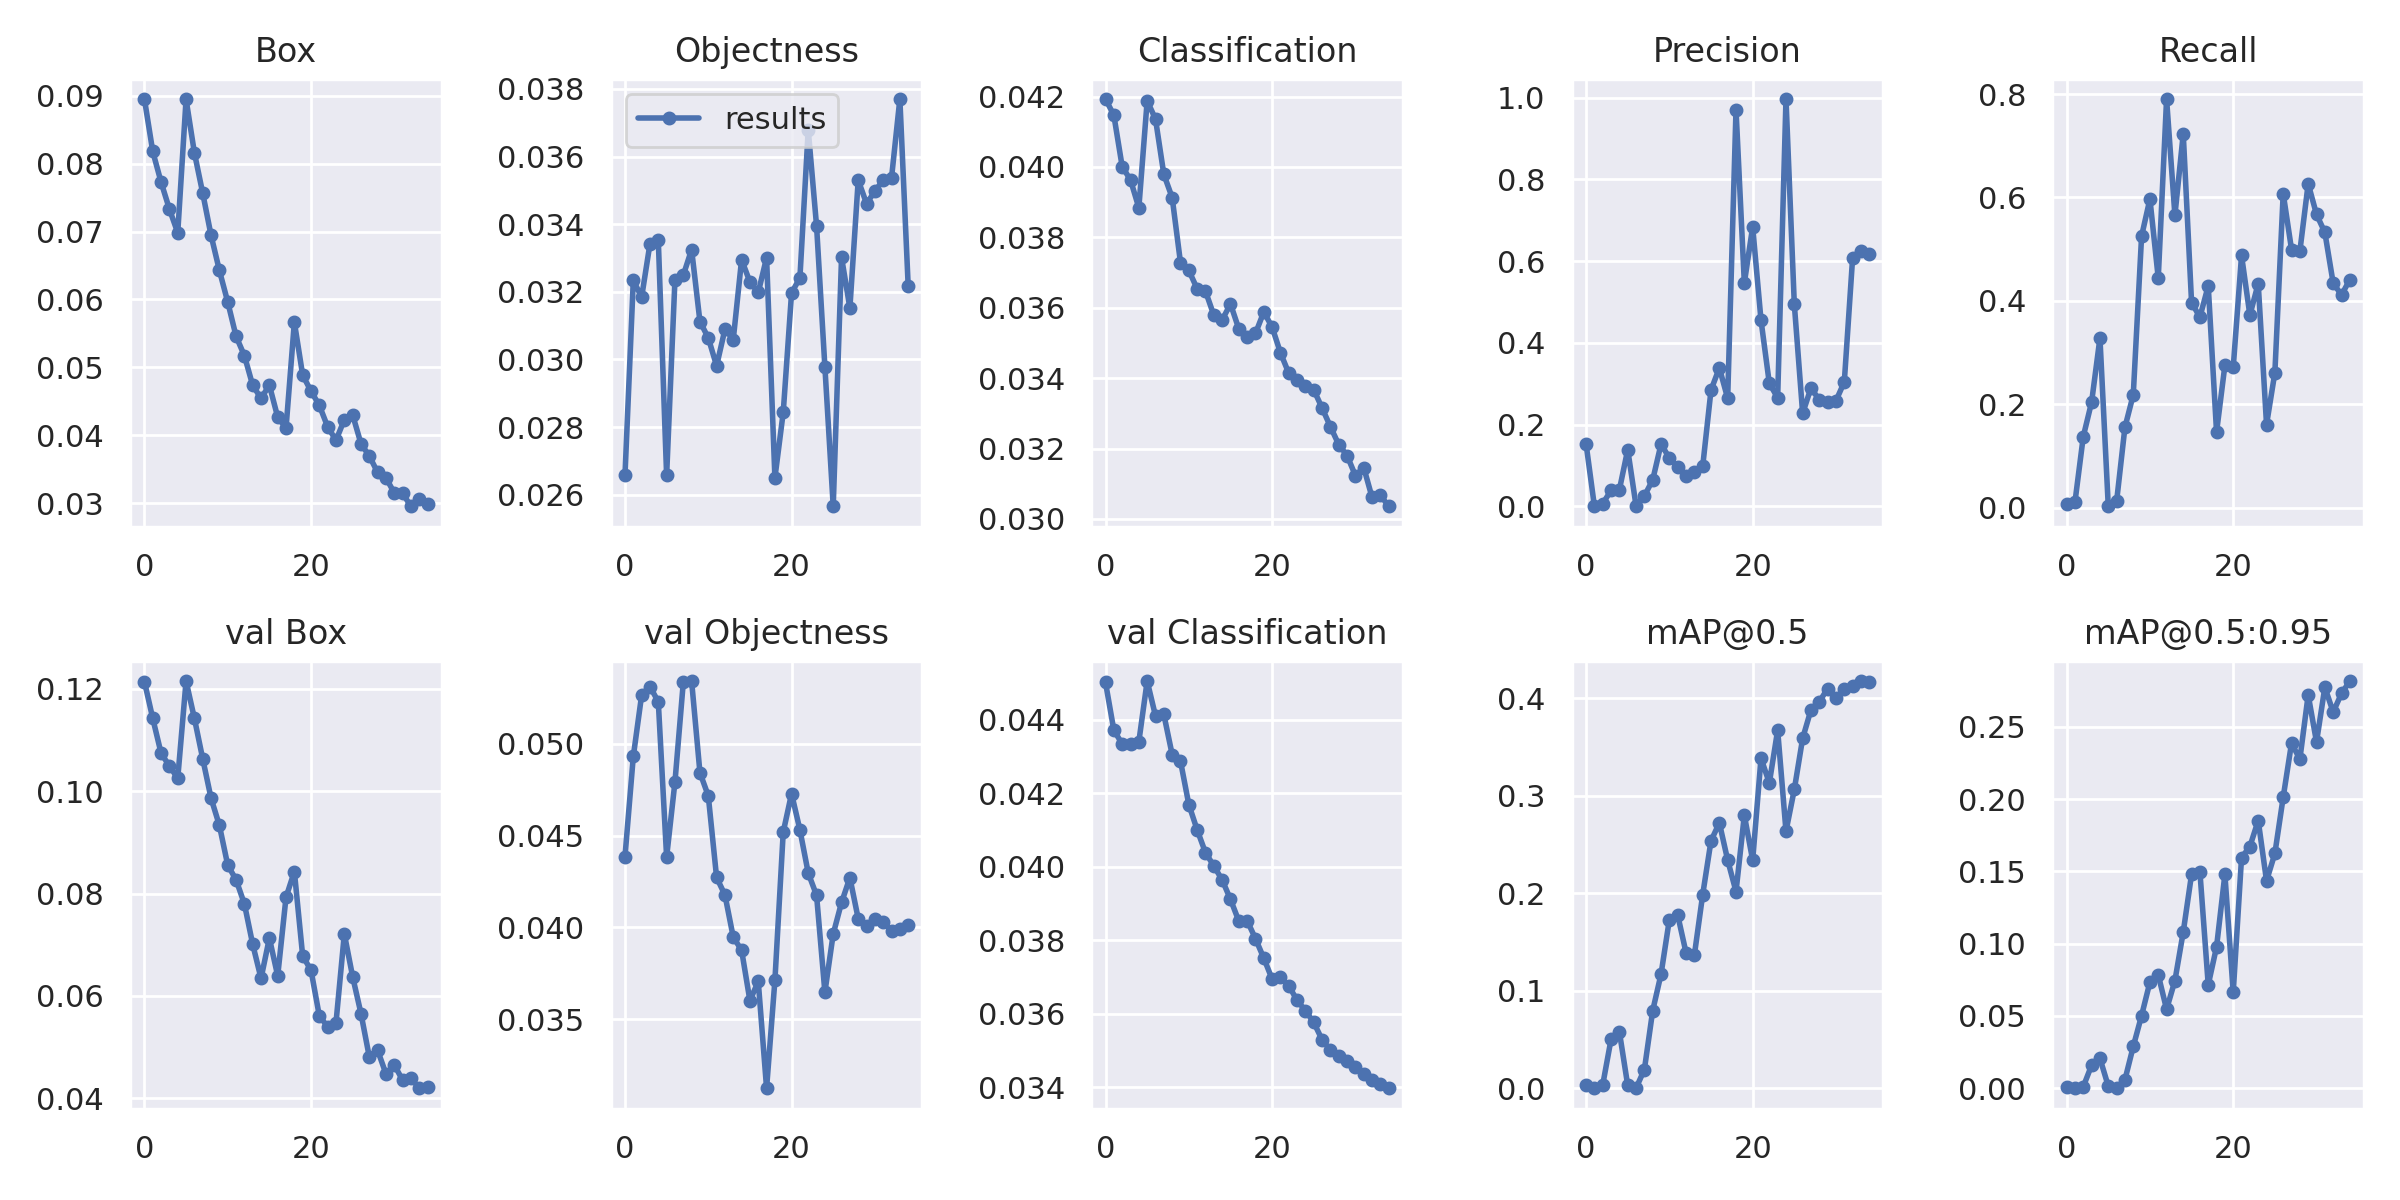

In [ ]:
from PIL import Image
pcurve = Image.open('/content/drive/MyDrive/Colab Notebooks/yolov7/runs/train/yolov7-custom/P_curve.png')
confusionmatrix = Image.open('/content/drive/MyDrive/Colab Notebooks/yolov7/runs/train/yolov7-custom/confusion_matrix.png')
results = Image.open('/content/drive/MyDrive/Colab Notebooks/yolov7/runs/train/yolov7-custom/results.png')

display(pcurve)
display(confusionmatrix)
display(results)

### Testing

In [ ]:
!python test.py --data "/content/drive/MyDrive/Colab Notebooks/Chess/data.yaml" --batch-size 16 --weights "/content/drive/MyDrive/Colab Notebooks/yolov7/runs/train/yolov7-custom/weights/best.pt" --exist-ok

Namespace(augment=False, batch_size=16, conf_thres=0.001, data='/content/drive/MyDrive/Colab Notebooks/Chess/data.yaml', device='', exist_ok=True, img_size=640, iou_thres=0.65, name='exp', no_trace=False, project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', v5_metric=False, verbose=False, weights=['/content/drive/MyDrive/Colab Notebooks/yolov7/runs/train/yolov7-custom/weights/best.pt'])
YOLOR 🚀 2022-12-5 torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36544546 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.8/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShap

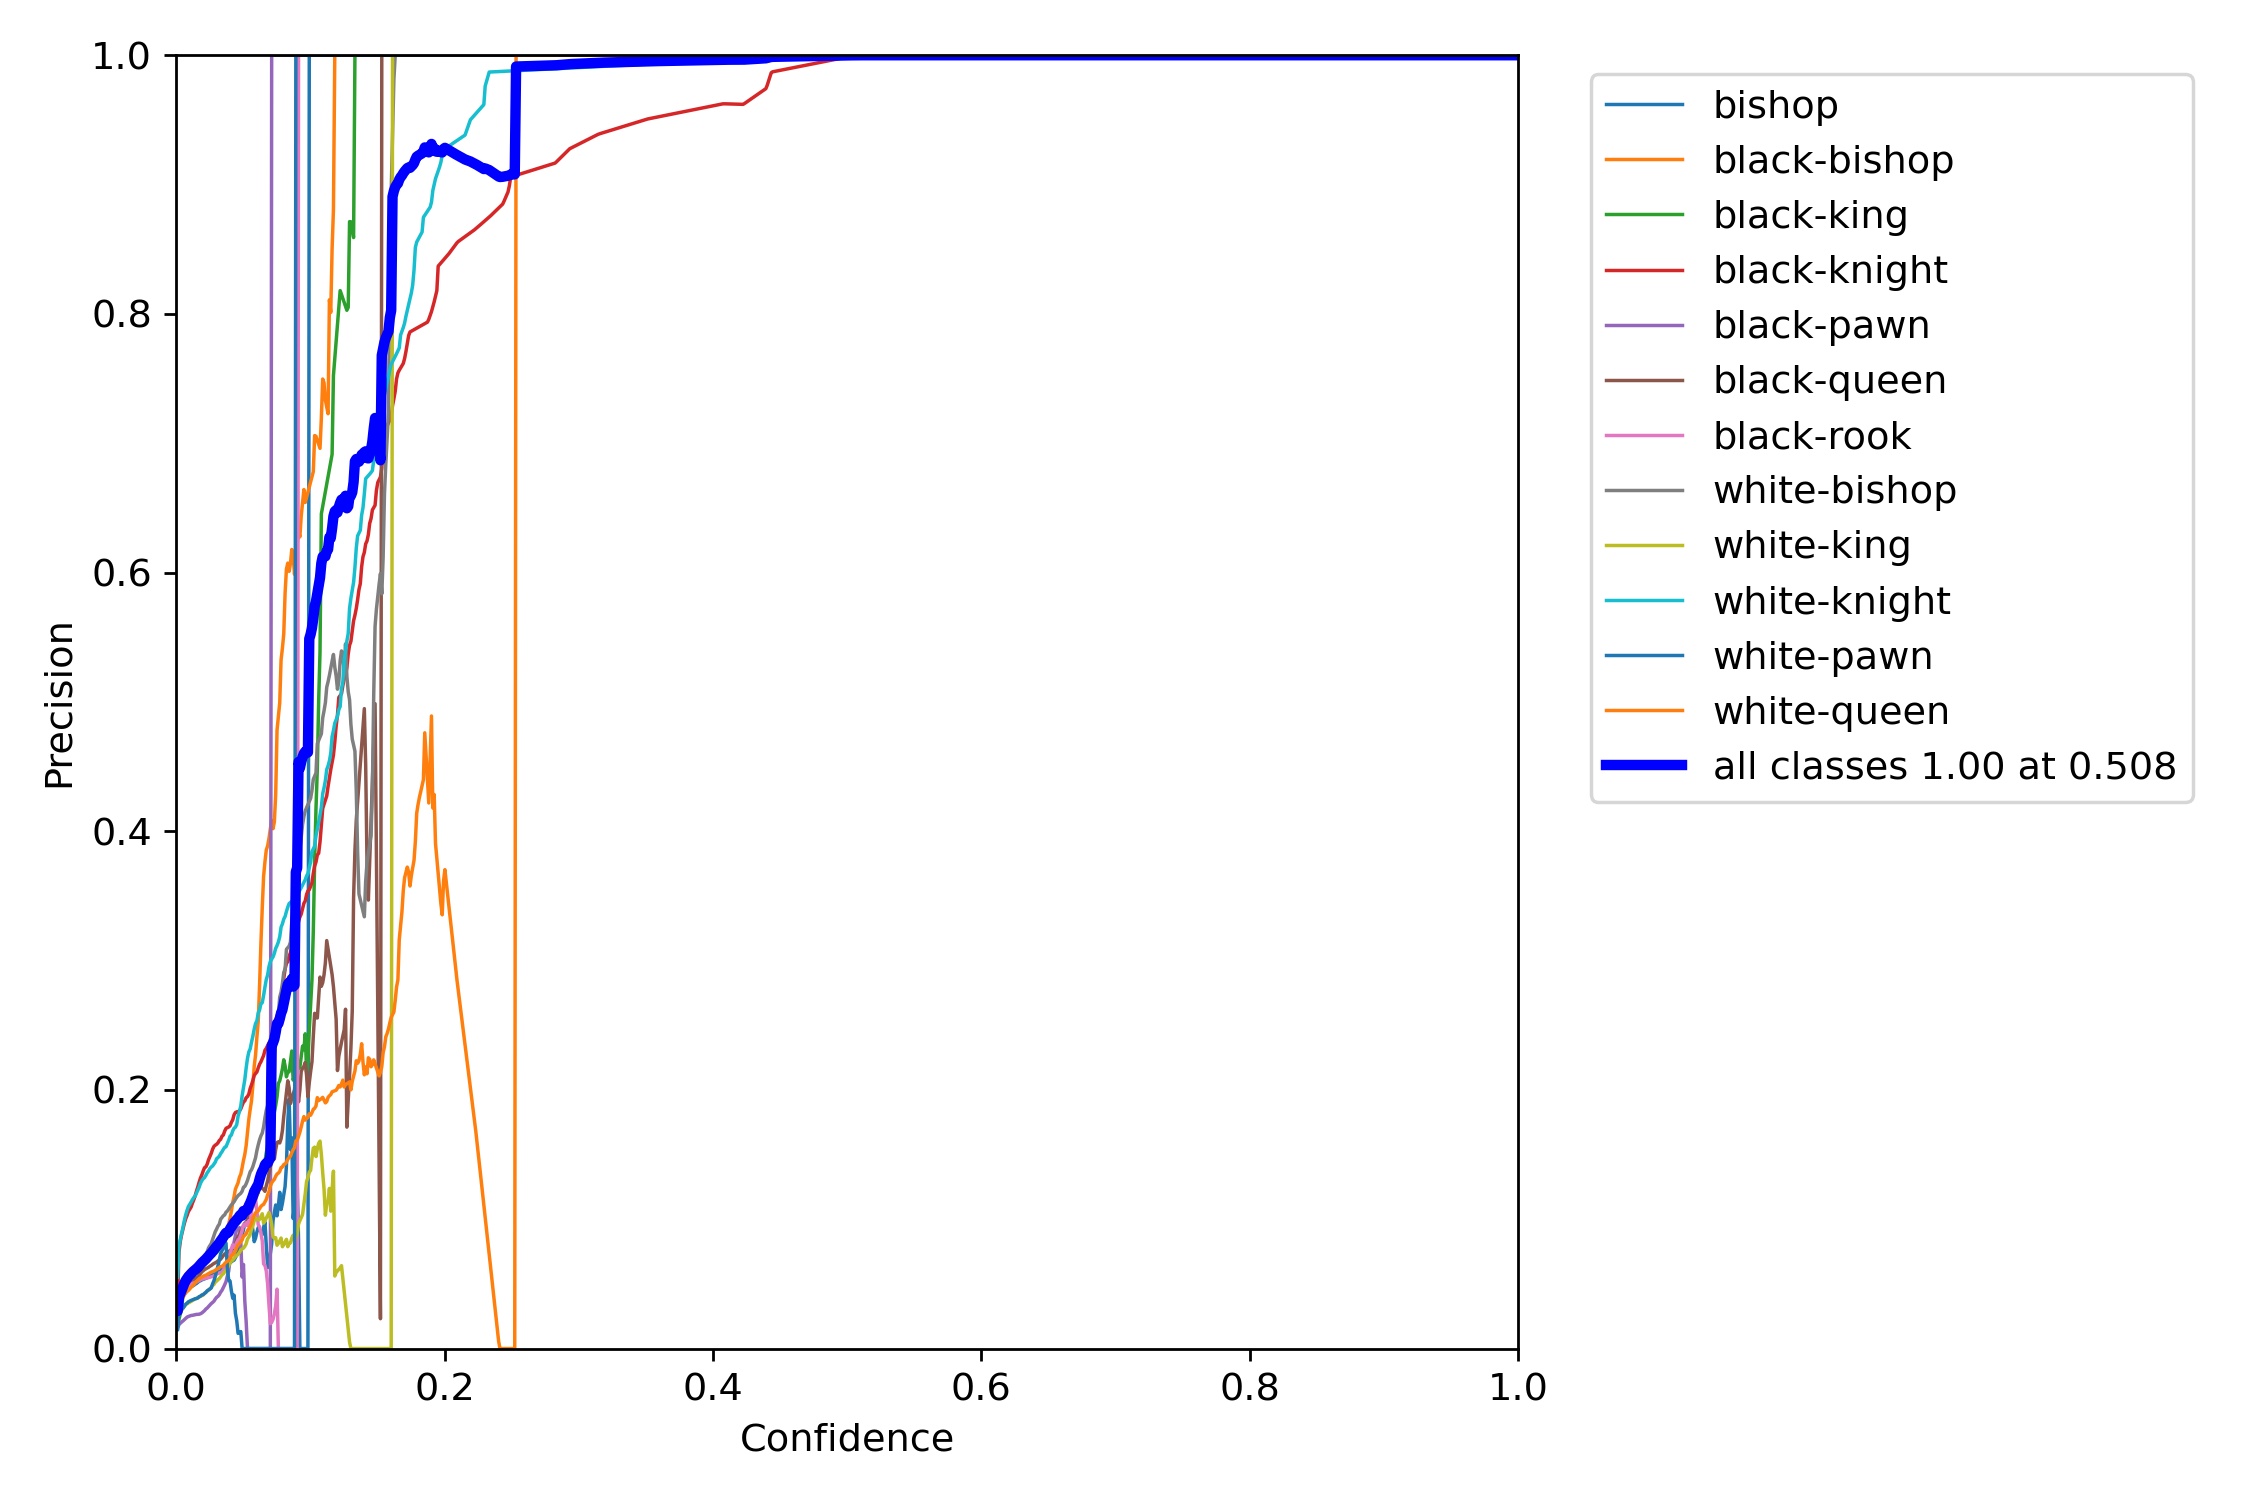

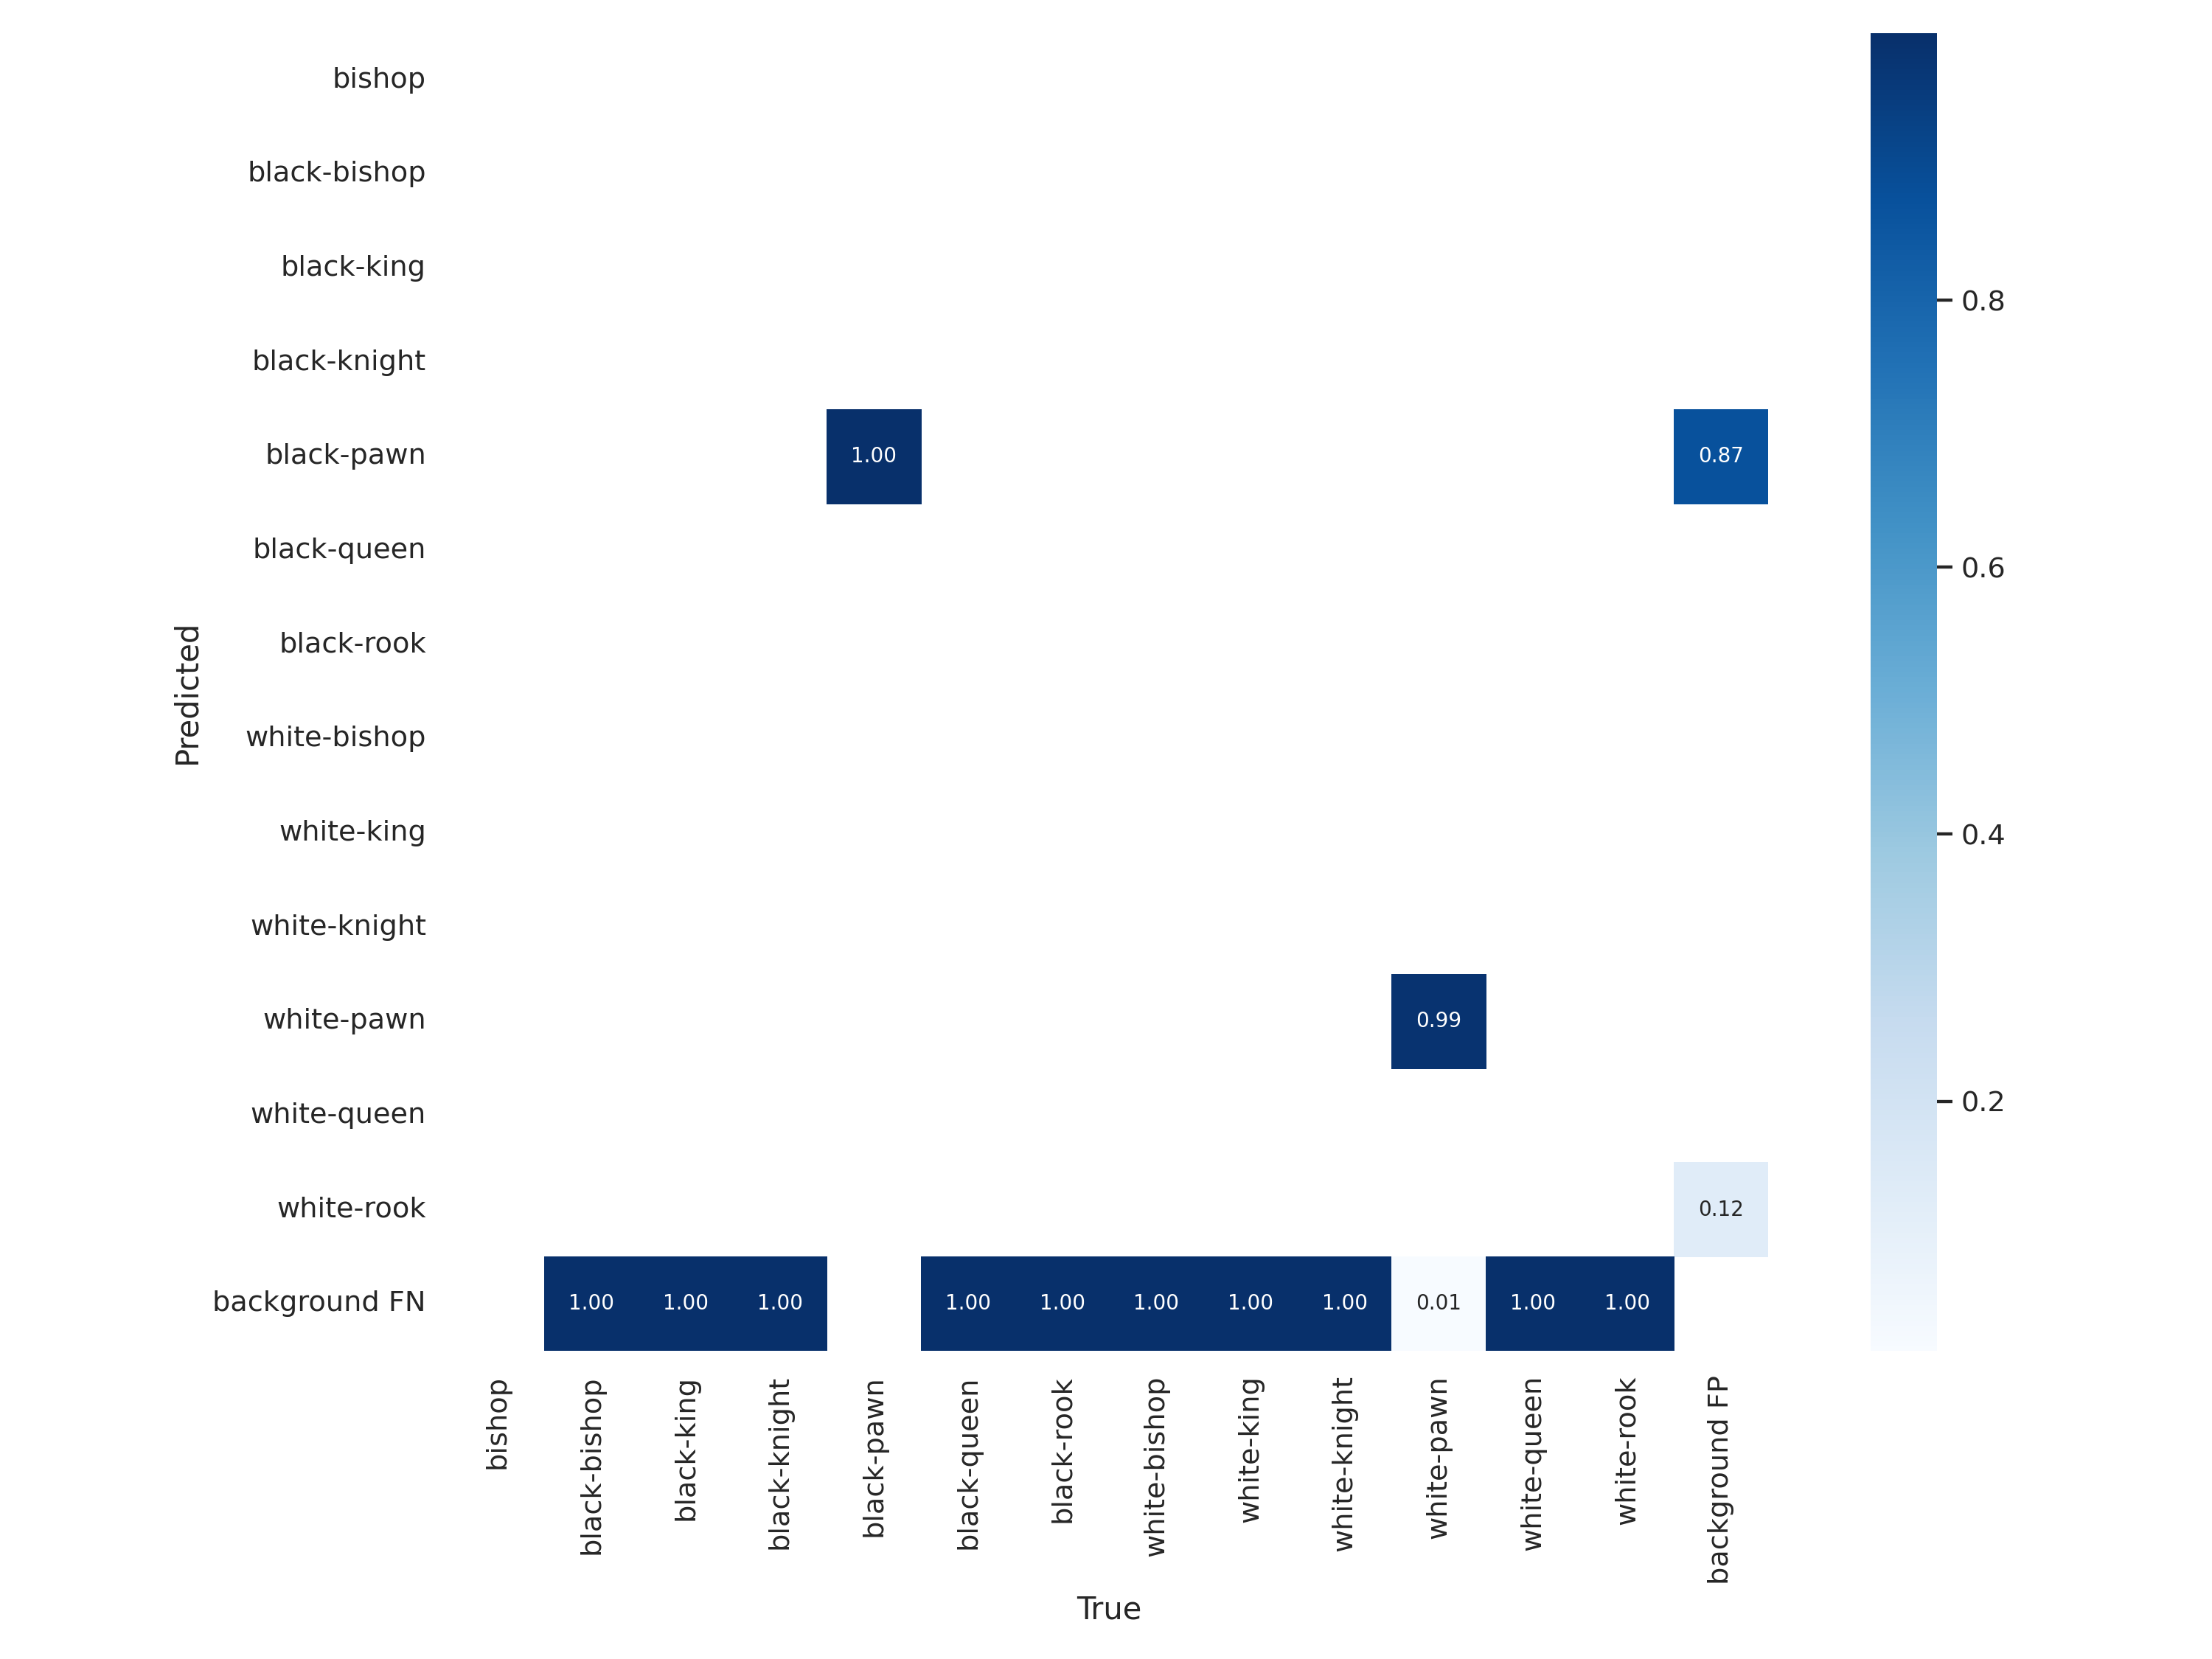

In [ ]:
pcurve = Image.open('/content/drive/MyDrive/Colab Notebooks/yolov7/runs/test/exp/P_curve.png')
confusionmatrix = Image.open('/content/drive/MyDrive/Colab Notebooks/yolov7/runs/test/exp/confusion_matrix.png')
#results = Image.open('/content/drive/MyDrive/Colab Notebooks/yolov7/runs/test/exp/results.png')

display(pcurve)
display(confusionmatrix)
#display(results)

The results here look terrible, *but* that was probably just because of the low number of epochs, which still took me forever to train. At first I tried it with 5 epochs, and it was even worse (I know, hard to imagine). With 300 epochs it would have probably been very good.

### Detecting

Running sample images on the model on which we used transfer learning on.

In [ ]:
!python detect.py --weights "/content/drive/MyDrive/Colab Notebooks/yolov7/runs/train/yolov7-custom/weights/best.pt" --conf 0.25 --img-size 640 --source "/content/drive/MyDrive/Colab Notebooks/Chess/test/images/a3863d0be6002c21b20ac88817b2c56f_jpg.rf.e421134b139d57e02e7df9468a35c1fb.jpg" --exist-ok

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=True, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/drive/MyDrive/Colab Notebooks/Chess/test/images/a3863d0be6002c21b20ac88817b2c56f_jpg.rf.e421134b139d57e02e7df9468a35c1fb.jpg', update=False, view_img=False, weights=['/content/drive/MyDrive/Colab Notebooks/yolov7/runs/train/yolov7-custom/weights/best.pt'])
YOLOR 🚀 2022-12-5 torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36544546 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.8/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered in

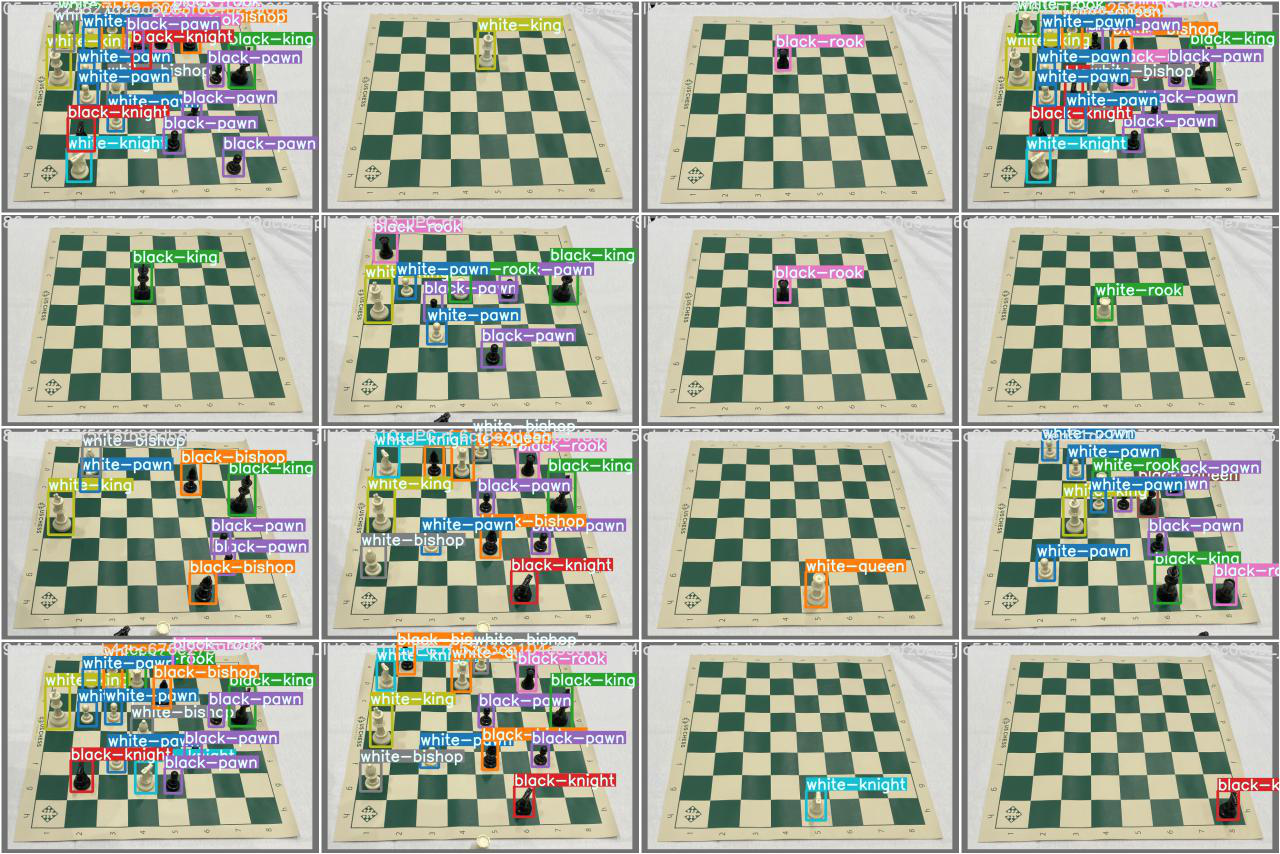

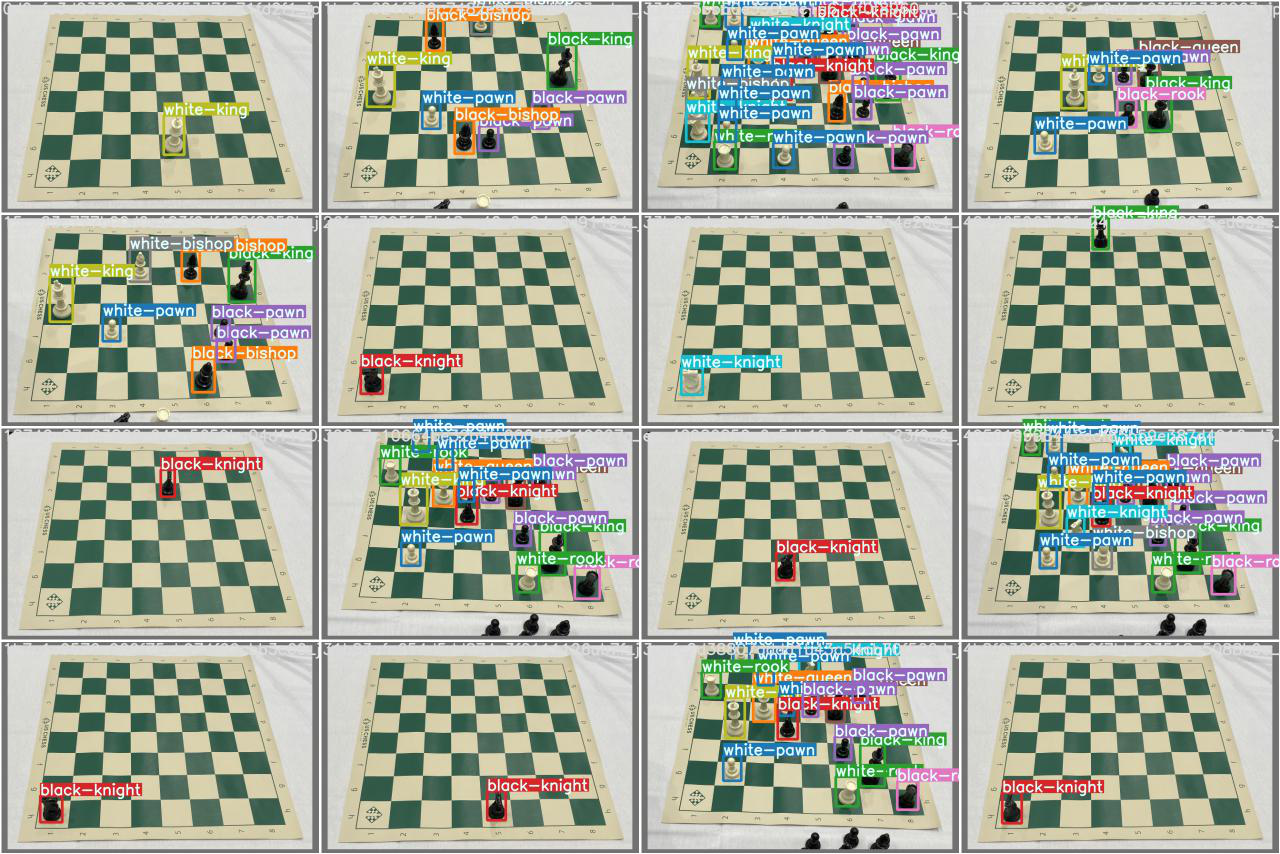

In [ ]:
pil_im1 = Image.open('/content/drive/MyDrive/Colab Notebooks/yolov7/runs/test/exp/test_batch0_labels.jpg')
pil_im2 = Image.open('/content/drive/MyDrive/Colab Notebooks/yolov7/runs/test/exp/test_batch2_labels.jpg')
display(pil_im1)
display(pil_im2)

# Analysis

Since I have had problems with my originally chosen dataset, I will not be able to compare the Sequential/RNN with the pretrained yolov7 model.

Generally, I can say, after working for quite a few time with a pretrained model, such as the YOLOv7, and before that the YOLOv5, I enjoy this more than building a model from scratch/using tensorflows sequential models. Not only are pretrained models higher in accuracy (well, I couldn't prove it this time, but there's a reason as to why those are so popular), but also you will save time by just going with the (probably objectively) better choice. Especially, if you want to use features like opencv and detect objects in a real life setting with your camera or a video recording.

There is still the option to, as we have done it here, use transfer learning to use an existing model, like the YOLOv7, and "customize it" for your dataset. I have personally done this over the course of this semester, as I was part of the ACM Research. We used the FLIR thermal imaging dataset to make our own model (YOLOvCAPY), which works best for thermal images, especially when detecting objects while driving a car, which is what the dataset was made for.

For a general purpose like this here, the Sequential or RNN model seemed alright, but as soon as you want to expand, it seems impossible with these limited resources.